In [3]:
import psycopg2
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['show']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


```
 altitude_second  - numeric(10,5)  - route       - First derivative of altitude. First entry by workout blank 
# altitude_first   - numeric(10,5)  - route       - Second derivative of altitude. First and second by workout blank
# speed_first      - numeric(10,5)  - performance - First derivative of speed.
# geo_distance     - numeric(20,10) - route       - Euclidean distance (sqrt((X2-X1)^2 + (Y2 - Y1)^2)) between points. First entry by workout blank
# elapsed_time     - integer        - route       - Time since start of workout.
# elapsed_distance - numeric(15,10) - route       - Distance since start of workout. Equal to: (row_number - 1) * (distance / series length )
# speed_ma_50      - numeric(8,5)   - performance - Moving average of 50 preceeding speed data points.
# speed_ma_100     - numeric(8,5)   - performance - Moving average of 100 preceeding speed data points.
# heart_rate_ma_25
```

In [5]:
from bokeh.charts import Bar, color, marker, show
from bokeh.io import output_notebook

#for attr in ['heart_rate', 'altitude', 'speed', 'altitude_first', 'altitude_second', 'speed_first', 'geo_distance', 'elapsed_time', 'elapsed_distance', 'speed_ma_50', 'speed_ma_100', 'heart_rate_ma_25']:
for attr in ['speed']:
    
    conn = psycopg2.connect("dbname='endomondo' user=ubuntu")
    query = "SELECT * FROM histogram('%s', 'run')" %(attr)
    cur = conn.cursor()
    cur.execute(query)
    data = cur.fetchall()


    df = pd.DataFrame(data, columns = ['bin', attr, 'frequency', '*']).drop('*', axis = 1)

    df[attr+'_lower'] = df[attr].apply(lambda x: int(np.round(float(x.lower), 1)))
    df[attr+'_upper'] = df[attr].apply(lambda x: int(np.round(float(x.upper), 1)))
    #df['heart_rate_lower'] = pd.Series([round(val, 2) for val in df['heart_rate_lower'], index = df.index])

    #.map(lambda x: "{:.0f}".format(x))


    output_notebook()

    # yscale = "log" doesn't appear logrithmic right now
    p = Bar(df, values='frequency', label = [attr+"_lower", attr+"_upper"],
            title=attr, yscale="log", legend = False)

    show(p)


Loading BokehJS ...

In [5]:
df

,bin,altitude,frequency,altitude_lower,altitude_upper
0,1,"NumericRange(Decimal('-500.0000000000'), Decim...",3931,-500.000000,-217.200000
1,2,"NumericRange(Decimal('-217.0000000000'), Decim...",4388143,-217.000000,65.767200
2,3,"NumericRange(Decimal('65.7700000000'), Decimal...",3315320,65.770000,348.649000
3,4,"NumericRange(Decimal('348.6550000000'), Decima...",569142,348.655000,631.531000
4,5,"NumericRange(Decimal('631.5530000000'), Decima...",289922,631.553000,914.400000
5,6,"NumericRange(Decimal('914.4445361357'), Decima...",50042,914.444536,1197.300000
6,7,"NumericRange(Decimal('1197.4000000000'), Decim...",94095,1197.400000,1480.090000
7,8,"NumericRange(Decimal('1480.2000000000'), Decim...",72816,1480.200000,1763.000000
8,9,"NumericRange(Decimal('1763.2000000000'), Decim...",21370,1763.200000,2045.800000
9,10,"NumericRange(Decimal('2046.0000000000'), Decim...",10065,2046.000000,2328.800000


In [42]:
df_clusters =pd.read_csv('cluster_centers.csv')

t1 = df_clusters.ix[1,1:-1].tolist()
t2 = df_clusters.ix[2,1:-1].tolist()
t3 = df_clusters.ix[3,1:-1].tolist()
t3
#print ['Cluster' + list(df_clusters.columns[1:])]

df_clusters.rename(columns={'Unnamed: 0':'Cluster'}, inplace=True)
df_clusters

,Cluster,max_elapsed_time,sum_geo_distance,avg_heart_rate,avg_speed,diff_altitude,count
0,0,907.368421,0.008490,154.530931,31.796894,4.326316e+00,19
1,1,667.000000,0.092171,157.730924,36.646807,2.660000e+01,3
2,2,17.500000,0.002206,110.919164,21.275659,7.840000e+00,10
3,3,0.000000,0.000002,122.000000,175.644000,3.552714e-15,1
4,4,5544.000000,0.015863,147.982906,25.051893,5.593333e+01,3


In [ ]:
df_sample = df.sample(False, 0.005, 42)


In [ ]:
import numpy as np
import pylab as pl

class Radar(object):

    def __init__(self, fig, titles, labels, rect=None):
        if rect is None:
            rect = [0.05, 0.05, 0.95, 0.95]

        self.n = len(titles)
        self.angles = np.arange(90, 90+360, 360.0/self.n)
        self.axes = [fig.add_axes(rect, projection="polar", label="axes%d" % i) 
                         for i in range(self.n)]

        self.ax = self.axes[0]
        self.ax.set_thetagrids(self.angles, labels=titles, fontsize=14)

        for ax in self.axes[1:]:
            ax.patch.set_visible(False)
            ax.grid("off")
            ax.xaxis.set_visible(False)

        for ax, angle, label in zip(self.axes, self.angles, labels):
            ax.set_rgrids(range(1, 6), angle=angle, labels=label)
            ax.spines["polar"].set_visible(False)
            ax.set_ylim(0, 50000)

    def plot(self, values, *args, **kw):
        angle = np.deg2rad(np.r_[self.angles, self.angles[0]])
        values = np.r_[values, values[0]]
        self.ax.plot(angle, values, *args, **kw)



fig = pl.figure(figsize=(6, 6))

titles = list("ABCDE")

labels = [
    list("abcde"), list("12345"), list("uvwxy"), 
    ["one", "two", "three", "four", "five"],
    list("jklmn")
]

radar = Radar(fig, titles, labels)
radar.plot(t1,  "-", lw=2, color="b", alpha=0.4, label="first")
radar.plot(t2,"-", lw=2, color="r", alpha=0.4, label="second")
radar.plot(t3, "-", lw=2, color="g", alpha=0.4, label="third")
radar.ax.legend()

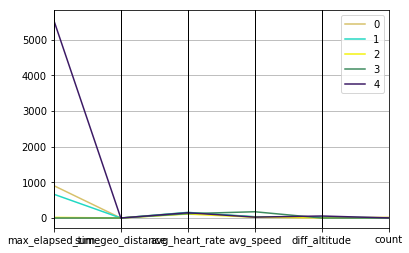

In [43]:
from pandas.tools.plotting import parallel_coordinates

plt.figure()
    
parallel_coordinates(df_clusters, 'Cluster')

In [45]:
t1

[667.0, 0.09217118373330001, 157.73092356700002, 36.6468071162, 26.6]

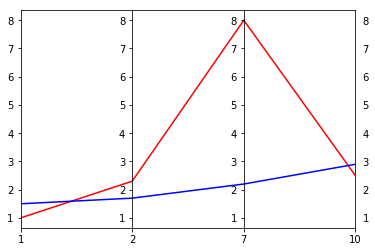

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

#vectors to plot: 4D for this example
y1=[1,2.3,8.0,2.5]
y2=[1.5,1.7,2.2,2.9]

x=[1,2,7,10] # spines

fig,(ax,ax2,ax3) = plt.subplots(1, 3, sharey=False)

# plot the same on all the subplots
ax.plot(x,y1,'r-', x,y2,'b-')
ax2.plot(x,y1,'r-', x,y2,'b-')
ax3.plot(x,y1,'r-', x,y2,'b-')

# now zoom in each of the subplots 
ax.set_xlim([ x[0],x[1]])
ax2.set_xlim([ x[1],x[2]])
ax3.set_xlim([ x[2],x[3]])

# set the x axis ticks 
for axx,xx in zip([ax,ax2,ax3],x[:-1]):
    axx.xaxis.set_major_locator(ticker.FixedLocator([xx]))
ax3.xaxis.set_major_locator(ticker.FixedLocator([x[-2],x[-1]]))  # the last one

# EDIT: add the labels to the rightmost spine
for tick in ax3.yaxis.get_major_ticks():
    tick.label2On=True

# stack the subplots together
plt.subplots_adjust(wspace=0)

plt.show()